In [2]:
reset -fs

In [3]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

In [4]:
engine = create_engine("sqlite:///mta_data.db")
df = pd.read_sql("SELECT * FROM mta_data", engine)

In [5]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,03:00:00,REGULAR,7672966,2645023
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,07:00:00,REGULAR,7672969,2645040
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,11:00:00,REGULAR,7672991,2645127
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,15:00:00,REGULAR,7673037,2645193
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,19:00:00,REGULAR,7673097,2645270


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732603 entries, 0 to 2732602
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 229.3+ MB


In [8]:
df.columns = [column.strip().lower(). replace('/','_')
for column in df.columns]
df.head()

,c_a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,03:00:00,REGULAR,7672966,2645023
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,07:00:00,REGULAR,7672969,2645040
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,11:00:00,REGULAR,7672991,2645127
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,15:00:00,REGULAR,7673037,2645193
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,19:00:00,REGULAR,7673097,2645270


In [9]:
df['date_time'] = pd.to_datetime(df['date'] + df['time'], format='%m/%d/%Y%H:%M:%S')

In [10]:
df.head()

,c_a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,03:00:00,REGULAR,7672966,2645023,2021-12-18 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,07:00:00,REGULAR,7672969,2645040,2021-12-18 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,11:00:00,REGULAR,7672991,2645127,2021-12-18 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,15:00:00,REGULAR,7673037,2645193,2021-12-18 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,19:00:00,REGULAR,7673097,2645270,2021-12-18 19:00:00


In [14]:
df.describe()

,entries,exits
count,2.732603e+06,2.732603e+06
mean,4.201794e+07,3.386391e+07
std,2.204692e+08,1.945824e+08
min,0.000000e+00,0.000000e+00
25%,2.330550e+05,1.144150e+05
50%,1.369239e+06,8.555220e+05
75%,6.007727e+06,3.992825e+06
max,2.147375e+09,2.122704e+09


In [15]:
#look for missing values
df.isna().values.any()  

False

In [16]:
#looking for null values
df.isnull().sum()

c_a          0
unit         0
scp          0
station      0
linename     0
division     0
date         0
time         0
desc         0
entries      0
exits        0
date_time    0
dtype: int64

In [17]:
mask = (df.isna == "True")

In [18]:
mask

False

In [19]:
#remove duplicates

In [20]:
df.desc.value_counts()

REGULAR       2721684
RECOVR AUD      10919
Name: desc, dtype: int64

In [22]:
pre_size = len(df)
df.drop_duplicates(subset = ["c_a", "unit", "scp", "station", "date"])
pre_size, len(df)

(2732603, 2732603)

In [24]:
df[["prev_entries"]] = (df.groupby(["c_a", "unit", "scp", "station"])[["entries"]].shift(1))
df[["prev_exits"]] = (df.groupby(["c_a", "unit", "scp", "station"])[["exits"]].shift(1))

In [25]:
df.head(5)

,c_a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,prev_entries,prev_exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,03:00:00,REGULAR,7672966,2645023,2021-12-18 03:00:00,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,07:00:00,REGULAR,7672969,2645040,2021-12-18 07:00:00,7672966.0,2645023.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,11:00:00,REGULAR,7672991,2645127,2021-12-18 11:00:00,7672969.0,2645040.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,15:00:00,REGULAR,7673037,2645193,2021-12-18 15:00:00,7672991.0,2645127.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,19:00:00,REGULAR,7673097,2645270,2021-12-18 19:00:00,7673037.0,2645193.0


In [27]:
df.dropna(subset=["prev_entries"], axis=0, inplace=True)

In [28]:
df.head(5)

,c_a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,prev_entries,prev_exits
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,07:00:00,REGULAR,7672969,2645040,2021-12-18 07:00:00,7672966.0,2645023.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,11:00:00,REGULAR,7672991,2645127,2021-12-18 11:00:00,7672969.0,2645040.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,15:00:00,REGULAR,7673037,2645193,2021-12-18 15:00:00,7672991.0,2645127.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,19:00:00,REGULAR,7673097,2645270,2021-12-18 19:00:00,7673037.0,2645193.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,23:00:00,REGULAR,7673128,2645283,2021-12-18 23:00:00,7673097.0,2645270.0


In [33]:
df["daily_exits"]=(df["exits"] - df["prev_exits"])

In [34]:
df.head(5)

,c_a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,prev_entries,prev_exits,daily_entries,daily_exits
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,07:00:00,REGULAR,7672969,2645040,2021-12-18 07:00:00,7672966.0,2645023.0,3.0,17.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,11:00:00,REGULAR,7672991,2645127,2021-12-18 11:00:00,7672969.0,2645040.0,22.0,87.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,15:00:00,REGULAR,7673037,2645193,2021-12-18 15:00:00,7672991.0,2645127.0,46.0,66.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,19:00:00,REGULAR,7673097,2645270,2021-12-18 19:00:00,7673037.0,2645193.0,60.0,77.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,23:00:00,REGULAR,7673128,2645283,2021-12-18 23:00:00,7673097.0,2645270.0,31.0,13.0


In [32]:
df["daily_entries"]=(df["entries"] - df["prev_entries"])

,entries,exits,prev_entries,prev_exits,daily_entries
count,2.727559e+06,2.727559e+06,2.727559e+06,2.727559e+06,2.727559e+06
mean,4.201780e+07,3.386348e+07,4.201978e+07,3.386496e+07,-1.982200e+03
std,2.204683e+08,1.945803e+08,2.204750e+08,1.945843e+08,4.408194e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.995577e+09
25%,2.330550e+05,1.144125e+05,2.330775e+05,1.144300e+05,3.000000e+00
50%,1.369339e+06,8.555310e+05,1.369312e+06,8.555700e+05,2.800000e+01
75%,6.007810e+06,3.993001e+06,6.007822e+06,3.993037e+06,9.800000e+01
max,2.147375e+09,2.122704e+09,2.147375e+09,2.122704e+09,1.995577e+09


In [35]:
df.head()

,c_a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,prev_entries,prev_exits,daily_entries,daily_exits
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,07:00:00,REGULAR,7672969,2645040,2021-12-18 07:00:00,7672966.0,2645023.0,3.0,17.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,11:00:00,REGULAR,7672991,2645127,2021-12-18 11:00:00,7672969.0,2645040.0,22.0,87.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,15:00:00,REGULAR,7673037,2645193,2021-12-18 15:00:00,7672991.0,2645127.0,46.0,66.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,19:00:00,REGULAR,7673097,2645270,2021-12-18 19:00:00,7673037.0,2645193.0,60.0,77.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,23:00:00,REGULAR,7673128,2645283,2021-12-18 23:00:00,7673097.0,2645270.0,31.0,13.0


In [36]:
df['total_traffic'] = df.daily_entries + df.daily_exits

In [37]:
df.head()

,c_a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,prev_entries,prev_exits,daily_entries,daily_exits,total_traffic
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,07:00:00,REGULAR,7672969,2645040,2021-12-18 07:00:00,7672966.0,2645023.0,3.0,17.0,20.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,11:00:00,REGULAR,7672991,2645127,2021-12-18 11:00:00,7672969.0,2645040.0,22.0,87.0,109.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,15:00:00,REGULAR,7673037,2645193,2021-12-18 15:00:00,7672991.0,2645127.0,46.0,66.0,112.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,19:00:00,REGULAR,7673097,2645270,2021-12-18 19:00:00,7673037.0,2645193.0,60.0,77.0,137.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,23:00:00,REGULAR,7673128,2645283,2021-12-18 23:00:00,7673097.0,2645270.0,31.0,13.0,44.0


In [38]:
clean_mta = df[(df.daily_entries >= 0) & (df.daily_exits >= 0) & (df.total_traffic >= 0) & (df.total_traffic < 100000)]
clean_mta.head()

,c_a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,prev_entries,prev_exits,daily_entries,daily_exits,total_traffic
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,07:00:00,REGULAR,7672969,2645040,2021-12-18 07:00:00,7672966.0,2645023.0,3.0,17.0,20.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,11:00:00,REGULAR,7672991,2645127,2021-12-18 11:00:00,7672969.0,2645040.0,22.0,87.0,109.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,15:00:00,REGULAR,7673037,2645193,2021-12-18 15:00:00,7672991.0,2645127.0,46.0,66.0,112.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,19:00:00,REGULAR,7673097,2645270,2021-12-18 19:00:00,7673037.0,2645193.0,60.0,77.0,137.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,23:00:00,REGULAR,7673128,2645283,2021-12-18 23:00:00,7673097.0,2645270.0,31.0,13.0,44.0


In [40]:
pre_size = len(clean_mta)
clean_mta.drop_duplicates(subset = ["c_a", "unit", "scp", "station", "date"])
pre_size, len(clean_mta)

(2637963, 2637963)

# Calculating the foot traffic for each day

In [61]:
df_daily = clean_mta.groupby(["c_a", "unit", "scp", "station", "date"])[['total_traffic']].sum().reset_index()
df_daily.head()

,c_a,unit,scp,station,date,total_traffic
0,A002,R051,02-00-00,59 ST,09/25/2021,494.0
1,A002,R051,02-00-00,59 ST,09/26/2021,522.0
2,A002,R051,02-00-00,59 ST,09/27/2021,952.0
3,A002,R051,02-00-00,59 ST,09/28/2021,985.0
4,A002,R051,02-00-00,59 ST,09/29/2021,999.0


In [63]:
#df_daily.describe()
(df_daily
 .groupby(["c_a", "unit", "scp", "station", "date"])
 .total_traffic.count()
 .reset_index()
 .sort_values("total_traffic", ascending=False)).head(5)

,c_a,unit,scp,station,date,total_traffic
0,A002,R051,02-00-00,59 ST,09/25/2021,1
300745,R141,R031,00-03-02,34 ST-PENN STA,11/19/2021,1
300756,R141,R031,00-03-02,34 ST-PENN STA,11/30/2021,1
300755,R141,R031,00-03-02,34 ST-PENN STA,11/29/2021,1
300754,R141,R031,00-03-02,34 ST-PENN STA,11/28/2021,1


In [68]:
#deleting duplicate records
df_daily.sort_values(["c_a", "unit", "scp", "station", "date"], inplace=True, ascending=False)
df_daily.drop_duplicates(subset=["c_a", "unit", "scp", "station", "date"], inplace=True)

(df_daily.groupby(["c_a", "unit", "scp", "station", "date"]).total_traffic.count().reset_index().sort_values("total_traffic", ascending=False))

,c_a,unit,scp,station,date,total_traffic
0,A002,R051,02-00-00,59 ST,09/25/2021,1
300745,R141,R031,00-03-02,34 ST-PENN STA,11/19/2021,1
300756,R141,R031,00-03-02,34 ST-PENN STA,11/30/2021,1
300755,R141,R031,00-03-02,34 ST-PENN STA,11/29/2021,1
300754,R141,R031,00-03-02,34 ST-PENN STA,11/28/2021,1
...,...,...,...,...,...,...
150371,N130,R383,01-06-00,80 ST,10/27/2021,1
150370,N130,R383,01-06-00,80 ST,10/26/2021,1
150369,N130,R383,01-06-00,80 ST,10/25/2021,1
150368,N130,R383,01-06-00,80 ST,10/24/2021,1


## Sorted the totat_traffic column in order to get the max value for a day

In [69]:
#df_daily.describe()

df_daily.sort_values(by='total_traffic', ascending=False, inplace=True)
df_daily_top10 =df_daily.head(n=10)
df_daily_top10

,c_a,unit,scp,station,date,total_traffic
255419,PTH03,R552,00-01-08,JOURNAL SQUARE,10/28/2021,181557.0
255437,PTH03,R552,00-01-08,JOURNAL SQUARE,11/15/2021,166763.0
255468,PTH03,R552,00-01-08,JOURNAL SQUARE,12/16/2021,143587.0
272452,PTH19,R549,02-00-08,NEWARK C,10/18/2021,102687.0
275613,PTH21,R540,01-00-03,PATH WTC 2,12/11/2021,96332.0
275606,PTH21,R540,01-00-03,PATH WTC 2,12/04/2021,95523.0
397596,R423,R429,00-00-01,PELHAM BAY PARK,10/30/2021,95451.0
397603,R423,R429,00-00-01,PELHAM BAY PARK,11/06/2021,94819.0
250986,PTH01,R549,00-00-08,NEWARK HW BMEBE,11/08/2021,94451.0
260191,PTH06,R546,00-00-07,PAVONIA/NEWPORT,11/04/2021,94376.0


# Total traffic for each station sorted in decs order

In [50]:
station_traffic = clean_mta.groupby("station")["total_traffic"].sum()\
        .reset_index()\
        .sort_values("total_traffic", ascending = False)
station_traffic.head()
top_10_station = station_traffic.head(n=10)
top_10_station

,station,total_traffic
61,34 ST-PENN STA,11728977.0
233,GRD CNTRL-42 ST,8821167.0
59,34 ST-HERALD SQ,8484716.0
14,14 ST-UNION SQ,7748571.0
110,86 ST,7697260.0
46,23 ST,7150309.0
353,TIMES SQ-42 ST,6889466.0
68,42 ST-PORT AUTH,6562692.0
9,125 ST,6258919.0
226,FULTON ST,6123507.0


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or retina
%matplotlib inline

# Plotting date v/s total traffic

Text(0.5, 1.0, 'Total Traffic per day')

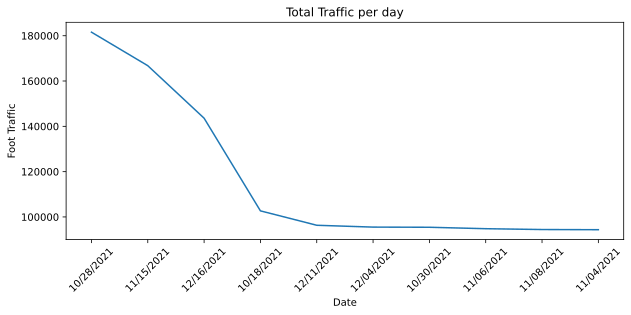

In [53]:

plt.figure(figsize=(10, 4))
plt.plot(df_daily_top10['date'], df_daily_top10['total_traffic'])
plt.ylabel('Foot Traffic')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Total Traffic per day')

# Bar Graph showing Top 10 Busiest Satation with highest foot traffic

Text(0.5, 1.0, 'Total Traffic per Station')

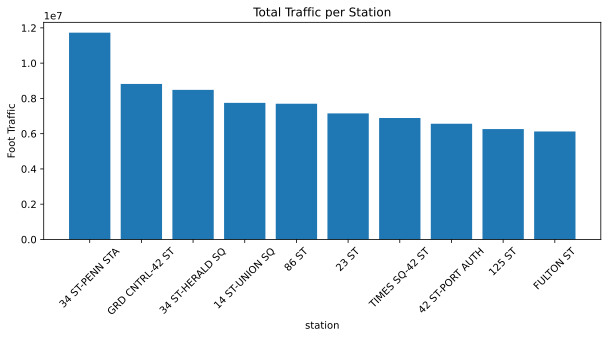

In [70]:
plt.figure(figsize=(10, 4))
plt.bar(top_10_station['station'], top_10_station['total_traffic'])
plt.ylabel('Foot Traffic')
plt.xlabel('station')
plt.xticks(rotation=45)
plt.title('Total Traffic per Station')